# Código para runear con una maquina virtual de GCP

In [0]:
pip install google-colab

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 72 kB 1.4 MB/s 
     |████████████████████████████████| 64 kB 2.7 MB/s 
     |████████████████████████████████| 104 kB 7.4 MB/s 
     |████████████████████████████████| 758 kB 7.4 MB/s 
     |████████████████████████████████| 8.0 MB 10.3 MB/s 
     |████████████████████████████████| 10.0 MB 59.0 MB/s 
     |████████████████████████████████| 57 kB 8.6 MB/s 
     |████████████████████████████████| 484 kB 60.4 MB/s 
     |████████████████████████████████| 245 kB 76.6 MB/s 
  Created wheel for google-colab: filename=google_colab-1.0.0-py2.py3-none-any.whl size=103346 sha256=a7e8005595bc2f52b59b4efda5306a1a02ca31695a2fc43dfd234d71293a879a
  Stored in directory: /home/jupyter/.cache/pip/wheels/f2/83/9a/7d948bf56ef6f22d2ed9af3b888a0c4bb011ad0f73bd885f81
  Created wheel for portpicker: filename=portpicker-1.2.0-py3-none-any.whl size=10633 sha256=fb39866b1919daceabe673b850c57457

## **Nos aseguramos de que estamos usando la GPU**
Si la celda no funciona, debemos de ir a Entorno de ejecución --> Cambiar tipo de entorno de ejecución, y seleccionar GPU

In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
!nvidia-smi

Sun Apr 19 11:47:04 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.87.01    Driver Version: 418.87.01    CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    38W / 300W |      0MiB / 16130MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
!sudo pip install gdown


  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
    Preparing wheel metadata ... - done
  Created wheel for gdown: filename=gdown-3.10.3-py3-none-any.whl size=9319 sha256=ca039a3d698bd8fad9fec5f1a4a33142b289cd6783f9e3479da129e1e3735dba
  Stored in directory: /root/.cache/pip/wheels/5b/b5/df/0bb5968026cdeb2a9d1864717c849e82dab52cf5febc7c88ac
Successfully built gdown


In [0]:
!sudo -s

root@tensorflow-1-vm:/home/jupyter/keras-retinanet# 

## Descargamos y descomprimimos el dataset de entrenamiento
El dataset se encuentra en drive, y probablemente tenga que conceder permisos para la descarga (Cuenta de Sergio);


In [0]:
!gdown --id 1qmpblGBsV0Ha4Vjd0ZDbBlpapQ474gep

Downloading...
From: https://drive.google.com/uc?id=1qmpblGBsV0Ha4Vjd0ZDbBlpapQ474gep
To: /home/jupyter/Copia de train 2.zip
10.8GB [03:02, 58.9MB/s]


In [0]:
!unzip '/home/jupyter/Copia de train 2.zip' -d train

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: train/__MACOSX/train/annos/._033870.json  
  inflating: train/train/annos/165888.json  
  inflating: train/__MACOSX/train/annos/._165888.json  
  inflating: train/train/annos/156311.json  
  inflating: train/__MACOSX/train/annos/._156311.json  
  inflating: train/train/annos/100571.json  
  inflating: train/__MACOSX/train/annos/._100571.json  
  inflating: train/train/annos/098375.json  
  inflating: train/__MACOSX/train/annos/._098375.json  
  inflating: train/train/annos/053271.json  
  inflating: train/__MACOSX/train/annos/._053271.json  
  inflating: train/train/annos/005411.json  
  inflating: train/__MACOSX/train/annos/._005411.json  
  inflating: train/train/annos/078121.json  
  inflating: train/__MACOSX/train/annos/._078121.json  
  inflating: train/train/annos/056589.json  
  inflating: train/__MACOSX/train/annos/._056589.json  
  inflating: train/train/annos/105289.json  
  inflating: train/__MACOSX/tr

## Instalamos e importamos todas las librerias y recursos que necesitamos


In [0]:
!git clone https://github.com/fizyr/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 5699 (delta 24), reused 36 (delta 15), pack-reused 5620
Receiving objects: 100% (5699/5699), 14.07 MiB | 18.29 MiB/s, done.
Resolving deltas: 100% (3794/3794), done.


In [0]:
!pip install --upgrade keras

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: keras in /usr/local/lib/python3.5/dist-packages (2.3.1)


In [0]:
%cd keras-retinanet/

!sudo pip install .

/content/keras-retinanet
Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=170880 sha256=480ce150a32a468b0d40bfd93f50d1be08d2480dca6df74d12dde350743f0a3f
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
Successfully built keras-retinanet
  Found existing installation: keras-retinanet 0.5.1
    Uninstalling keras-retinanet-0.5.1:
      Successfully uninstalled keras-retinanet-0.5.1


In [0]:
!python setup.py build_ext --inplace

running build_ext
skipping 'keras_retinanet/utils/compute_overlap.c' Cython extension (up-to-date)
copying build/lib.linux-x86_64-2.7/keras_retinanet/utils/compute_overlap.so -> keras_retinanet/utils


In [0]:
!pip install gdown
!pip install tensorflow-gpu==1.15 

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     |██████████████████████▊         | 292.0 MB 111.5 MB/s eta 0:00:02

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 411.5 MB 326 bytes/s 
     |████████████████████████████████| 3.8 MB 61.1 MB/s 
     |████████████████████████████████| 20.0 MB 88.7 MB/s 
     |████████████████████████████████| 503 kB 76.9 MB/s 
ERROR: tensorflow-serving-api-gpu 1.14.0 has requirement tensorflow-gpu~=1.14.0, but you'll have tensorflow-gpu 1.15.0 which is incompatible.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [0]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import urllib
import os
import csv
import cv2
import time
from PIL import Image

from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
#tf.random.set_seed(RANDOM_SEED)

In [0]:
!pwd

/home/jupyter/keras-retinanet


## Creamos un dataFrame, que más tarde convertiremos a CSV
Para poder entrenar el modelo, tensroflow requiere que le pasemos un csv con la información, las siguientes celdas crean el CSV de manera que tensorflow lo entienda


In [0]:
import json
dataset = dict()
dataset["image_name"] = list()
dataset["x_min"] = list()
dataset["y_min"] = list()
dataset["x_max"] = list()
dataset["y_max"] = list()
dataset["class_name"] = list()


directory1 = '/home/jupyter/train/train/image'
directory2 = '/home/jupyter/train/train/annos'
images=os.listdir(directory1)
annos=os.listdir(directory2)


counter = 0
for filename in images:
    nombre=filename[:-4]
    with open('/home/jupyter/train/train/annos/'+nombre+'.json') as f:
      data = json.load(f)

    all_boxes=[]
    for key, value in data.items():
      if('item' in key):
        value['bounding_box'].append(value['category_name'])
        all_boxes.append(value['bounding_box'])

    for i in all_boxes:
      ruta=str('/home/jupyter/train/train/image/'+filename)
      dataset["image_name"].append(ruta)

      dataset["x_min"].append(i[0])
      dataset["y_min"].append(i[1])
      dataset["x_max"].append(i[2])
      dataset["y_max"].append(i[3])
      dataset["class_name"].append(i[4])
    counter=1+counter
    print("Foto "+str(counter)+" de "+ str(len(images)))
  


Se han truncado las últimas 5000 líneas del flujo de salida.
Foto 186963 de 191961
Foto 186964 de 191961
Foto 186965 de 191961
Foto 186966 de 191961
Foto 186967 de 191961
Foto 186968 de 191961
Foto 186969 de 191961
Foto 186970 de 191961
Foto 186971 de 191961
Foto 186972 de 191961
Foto 186973 de 191961
Foto 186974 de 191961
Foto 186975 de 191961
Foto 186976 de 191961
Foto 186977 de 191961
Foto 186978 de 191961
Foto 186979 de 191961
Foto 186980 de 191961
Foto 186981 de 191961
Foto 186982 de 191961
Foto 186983 de 191961
Foto 186984 de 191961
Foto 186985 de 191961
Foto 186986 de 191961
Foto 186987 de 191961
Foto 186988 de 191961
Foto 186989 de 191961
Foto 186990 de 191961
Foto 186991 de 191961
Foto 186992 de 191961
Foto 186993 de 191961
Foto 186994 de 191961
Foto 186995 de 191961
Foto 186996 de 191961
Foto 186997 de 191961
Foto 186998 de 191961
Foto 186999 de 191961
Foto 187000 de 191961
Foto 187001 de 191961
Foto 187002 de 191961
Foto 187003 de 191961
Foto 187004 de 191961
Foto 187005 de 

In [0]:
df = pd.DataFrame(dataset)
df.head()

class_name                                  image_name  x_max  \
0  long sleeve outwear  /home/jupyter/train/train/image/086736.jpg    491   
1               shorts  /home/jupyter/train/train/image/086736.jpg    467   
2               shorts  /home/jupyter/train/train/image/120997.jpg    483   
3     short sleeve top  /home/jupyter/train/train/image/120997.jpg    419   
4           vest dress  /home/jupyter/train/train/image/151995.jpg    622   

   x_min  y_max  y_min  
0     33    744    153  
1    227    746    568  
2    171    391     93  
3    164    143      0  
4    342    797    254

In [0]:
df = df[["image_name", "x_min", "y_min","x_max","y_max","class_name"]]

In [0]:
df.head()

image_name  x_min  y_min  x_max  y_max  \
0  /home/jupyter/train/train/image/086736.jpg     33    153    491    744   
1  /home/jupyter/train/train/image/086736.jpg    227    568    467    746   
2  /home/jupyter/train/train/image/120997.jpg    171     93    483    391   
3  /home/jupyter/train/train/image/120997.jpg    164      0    419    143   
4  /home/jupyter/train/train/image/151995.jpg    342    254    622    797   

            class_name  
0  long sleeve outwear  
1               shorts  
2               shorts  
3     short sleeve top  
4           vest dress

In [0]:
df.iloc[0]

class_name                           long sleeve outwear
image_name    /home/jupyter/train/train/image/086736.jpg
x_max                                                491
x_min                                                 33
y_max                                                744
y_min                                                153
Name: 0, dtype: object

## Creamos un método que nos permita visualizar las imagenes
Las imagenes se visualizaran con el recuadro que marca la prenda de ropa.

In [0]:
def show_image_objects(image_row):

  img_path = image_row.image_name
  box = [
    image_row.x_min, image_row.y_min, image_row.x_max, image_row.y_max
  ]

  image = read_image_bgr(img_path)

  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  draw_box(draw, box, color=(255, 255, 0))

  plt.axis('off')
  plt.imshow(draw)
  plt.show()

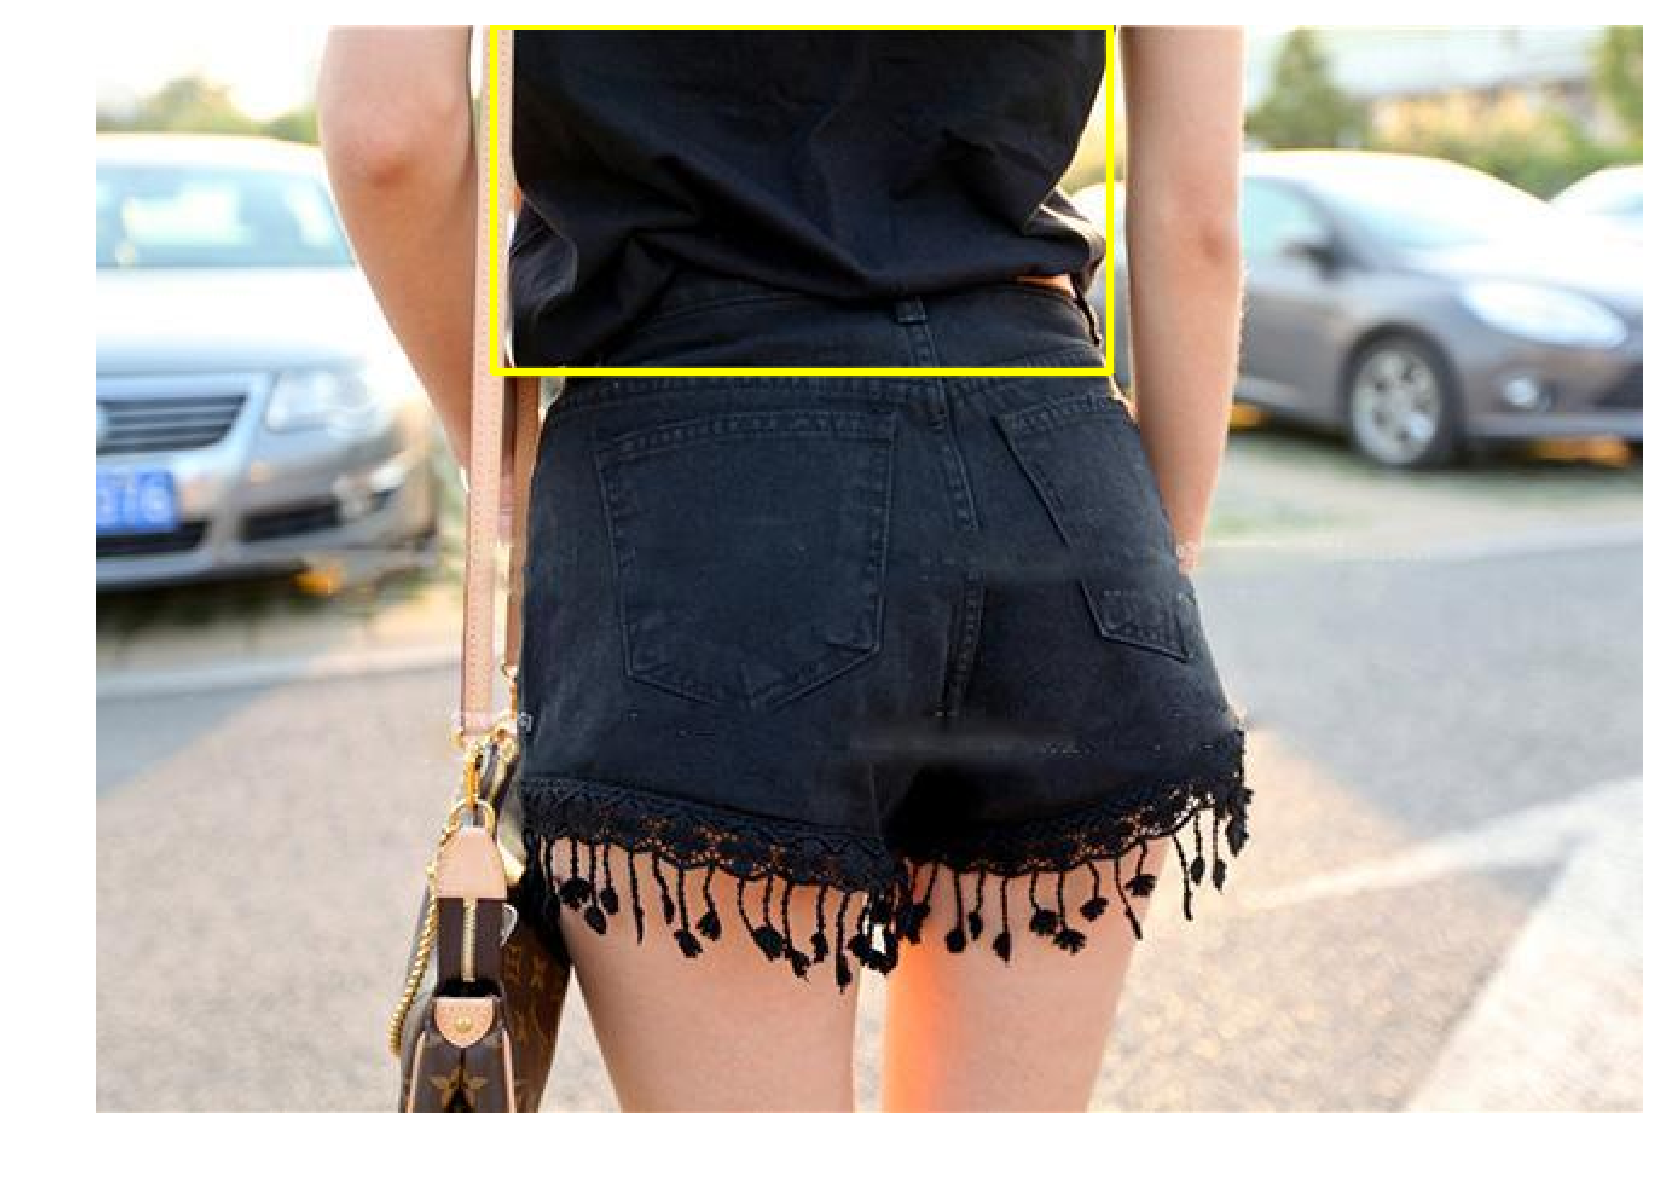

In [0]:
show_image_objects(df.iloc[3])

## Preparamos los datos que mandaremos a entrenar el modelo

In [0]:
ANNOTATIONS_FILE = 'annotations.csv'
CLASSES_FILE = 'classes.csv'

Borramos filas que se han corrompido a lo largo del pre-procesado

In [0]:
df.shape

(312186, 6)

In [0]:
df_new = df.drop(df[(df['x_min'] == 0) & (df['y_min'] == 0.0) & (df['x_max'] == 0.0) & (df['y_max'] == 0.0)].index)

In [0]:
df_new.shape

(312185, 6)

Partimos los datos en Train y Test

In [0]:
train_df, test_df = train_test_split(
  df_new, 
  test_size=0.2, 
  random_state=RANDOM_SEED
)

In [0]:
train_df.to_csv(ANNOTATIONS_FILE, index=False, header=None)

In [0]:
classes = {'short sleeve top','long sleeve top','short sleeve outwear','long sleeve outwear','vest','sling','shorts','trousers','skirt','short sleeve dress','long sleeve dress','vest dress','sling dress'}

with open(CLASSES_FILE, 'w') as f:
  for i, line in enumerate(sorted(classes)):
    f.write('{},{}\n'.format(line,i))

In [0]:
!head classes.csv
!head annotations.csv

long sleeve dress,0
long sleeve outwear,1
long sleeve top,2
short sleeve dress,3
short sleeve outwear,4
short sleeve top,5
shorts,6
skirt,7
sling,8
sling dress,9
/home/jupyter/train/train/image/027385.jpg,232,38,231,93,skirt
/home/jupyter/train/train/image/103460.jpg,617,177,580,194,long sleeve top
/home/jupyter/train/train/image/047886.jpg,375,79,547,100,skirt
/home/jupyter/train/train/image/002645.jpg,313,136,471,286,skirt
/home/jupyter/train/train/image/044317.jpg,272,69,678,484,shorts
/home/jupyter/train/train/image/061036.jpg,467,0,331,0,shorts
/home/jupyter/train/train/image/189320.jpg,617,223,840,389,long sleeve top
/home/jupyter/train/train/image/044852.jpg,565,179,799,5,long sleeve outwear
/home/jupyter/train/train/image/085585.jpg,429,137,475,174,short sleeve top
/home/jupyter/train/train/image/141422.jpg,340,28,412,27,vest


## Cargamos el ssd de Tensorflow


In [0]:
os.makedirs("snapshots", exist_ok=True)

In [0]:
PRETRAINED_MODEL = './snapshots/_pretrained_model.h5'

URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)

print('Downloaded pretrained model to ' + PRETRAINED_MODEL)

Downloaded pretrained model to ./snapshots/_pretrained_model.h5


## Entrenamos el modelo


In [0]:
!sudo -s

root@tensorflow-1-vm:/home/jupyter/keras-retinanet# ^C

root@tensorflow-1-vm:/home/jupyter/keras-retinanet# 

Debemos de importar con la siguiente sintaxis, para que se aplique a la VM de GCP

In [0]:
!sudo python -m pip install progressbar2

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
  Using cached progressbar2-3.50.1-py2.py3-none-any.whl (51 kB)
  Using cached python_utils-2.4.0-py2.py3-none-any.whl (12 kB)


In [0]:
!sudo python -m pip install  keras_resnet

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=21292 sha256=b3d5c5415536fd991876d06e33d0c2dfd4a26f1d98487728421b1a377130b6ba
  Stored in directory: /root/.cache/pip/wheels/6a/df/af/f460f628bfb8484b142a24a782465867814c57ebb8b2e5ed67
Successfully built keras-resnet


Para ver que librerias tenemos importadas usamos pip freeze


In [0]:
!pip freeze


absl-py==0.9.0
ansiwrap==0.8.4
arrow==0.15.5
astor==0.8.1
astroid==2.3.3
astropy==3.2.3
attrs==19.3.0
backcall==0.1.0
bcolz==1.2.1
binaryornot==0.4.4
bleach==3.1.0
cachetools==4.0.0
certifi==2019.11.28
chardet==3.0.4
Click==7.0
cloudpickle==1.2.2
colorama==0.4.3
configparser==4.0.2
confuse==1.0.0
cookiecutter==1.7.0
cryptography==1.7.1
cycler==0.10.0
Cython==0.29.16
daal==2019.0
datalab==1.1.5
decorator==4.4.1
defusedxml==0.6.0
dill==0.3.1.1
distro==1.0.1
docker==4.1.0
entrypoints==0.3
enum34==1.1.6
fairing==0.5.3
filelock==3.0.12
fsspec==0.6.2
future==0.18.2
gast==0.2.2
gcsfs==0.6.0
gdown==3.10.3
gitdb2==2.0.6
GitPython==3.0.5
google-api-core==1.16.0
google-api-python-client==1.7.11
google-auth==1.11.0
google-auth-httplib2==0.0.3
google-auth-oauthlib==0.4.1
google-cloud-bigquery==1.23.1
google-cloud-core==1.2.0
google-cloud-dataproc==0.6.1
google-cloud-datastore==1.10.0
google-cloud-language==1.3.0
google-cloud-logging==1.14.0
google-cloud-monitoring==0.31.1
google-cloud-spanner==1.13

Se crearan tantos modelos como "epochs" pongamos, cuantos más epochs mejor, pero tambien habrá que tener cuidado con el sobreentrenamiento.

In [0]:
%cd keras-retinanet/

!sudo keras_retinanet/bin/train.py \
--freeze-backbone \
--random-transform \
--weights {PRETRAINED_MODEL} \
--batch-size 8 \
--steps 800 \
--epochs 20 \
csv annotations.csv classes.csv

[Errno 2] No such file or directory: 'keras-retinanet/'
/home/jupyter/keras-retinanet
Using TensorFlow backend.
2020-04-19 12:32:28.904172: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-04-19 12:32:29.531771: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.6
2020-04-19 12:32:29.533849: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.6
Creating model, this may take a second...
2020-04-19 12:35:43.263409: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-04-19 12:35:43.940667: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-04-19 12:35:43.941397: I tensorflow/cor

In [0]:
!zip -r /content/file.zip /content/keras-retinanet/snapshots
from google.colab import files
files.download("/content/file.zip")

## Probar modelo


Se repiten todas las importaciones pasadas, por si estamos trabajando a partir de este punto. Ademas de crear CLASSES_FILE que lo volvemos a necesitar

In [0]:
!git clone https://github.com/fizyr/keras-retinanet.git
!pip install --upgrade keras
%cd keras-retinanet/

!sudo pip install .
!python setup.py build_ext --inplace
!pip install tensorflow-gpu==1.15 

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 5705 (delta 28), reused 35 (delta 15), pack-reused 5620
Receiving objects: 100% (5705/5705), 15.48 MiB | 28.71 MiB/s, done.
Resolving deltas: 100% (3791/3791), done.
Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.3.1)
/content/keras-retinanet
Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=170878 sha256=21515d7729c4a117b110f47aa372dcc884463776a7c5cedba78189a9349ef155
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
  Created wheel for keras-resnet: filename=keras_resnet-0.1.0-py2.py3-none-any.whl size=13346 sha256=952ceb7bc15d2aacce704d7d1431058d3832b9821c78293b2638a64ce59ea320
  Stored in directory: /root/.cache/pip/wheels/80/

In [0]:
CLASSES_FILE = 'classes.csv'

In [0]:
classes = {'short sleeve top','long sleeve top','short sleeve outwear','long sleeve outwear','vest','sling','shorts','trousers','skirt','short sleeve dress','long sleeve dress','vest dress','sling dress'}

with open(CLASSES_FILE, 'w') as f:
  for i, line in enumerate(sorted(classes)):
    f.write('{},{}\n'.format(line,i))

In [0]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import urllib
import os
import csv
import cv2
import time
from PIL import Image

from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
#tf.random.set_seed(RANDOM_SEED)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Cargamos el modelo creado

In [0]:
import os
model_path = os.path.join('/content/keras-retinanet/snapshots/resnet50_csv_20.h5')
print(model_path)

model = models.load_model(model_path, backbone_name='resnet50')
model = models.convert_model(model)

labels_to_names = pd.read_csv(CLASSES_FILE, header=None).T.loc[0].to_dict()

/content/keras-retinanet/snapshots/resnet50_csv_20.h5
Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_1:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_2:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_3:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_4:0' shape=(9, 4) dtype=float32> anchors


In [0]:
def predict(image):
  image = preprocess_image(image.copy())
  image, scale = resize_image(image)

  boxes, scores, labels = model.predict_on_batch(
    np.expand_dims(image, axis=0)
  )

  boxes /= scale

  return boxes, scores, labels

In [0]:
THRES_SCORE = 0.3

def draw_detections(image, boxes, scores, labels):
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
    if score < THRES_SCORE:
        break

    color = label_color(label)

    b = box.astype(int)
    draw_box(image, b, color=color)

    caption = "{} {:.3f}".format(labels_to_names[label], score)
    print(b)
    print(caption)

    b = np.array(b).astype(int)
    cv2.putText(image, caption, (b[0], b[1] + 10), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1)



In [0]:
def show_detected_objects(image_row):
  img_path = image_row.image_name
  
  image = read_image_bgr(img_path)

  boxes, scores, labels = predict(image)

  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  true_box = [
    image_row.x_min, image_row.y_min, image_row.x_max, image_row.y_max
  ]
  draw_box(draw, true_box, color=(255, 255, 0))

  draw_detections(draw, boxes, scores, labels)

  plt.axis('off')
  plt.imshow(draw)
  plt.show()

In [0]:
import traceback
from PIL import ExifTags
def predecir(img_path):
  try :
        image=Image.open(img_path)
        for orientation in ExifTags.TAGS.keys() : 
            if ExifTags.TAGS[orientation]=='Orientation' : break 
        exif=dict(image._getexif().items())

        if   exif[orientation] == 3 : 
            image=image.rotate(180, expand=True)
        elif exif[orientation] == 6 : 
            image=image.rotate(270, expand=True)
        elif exif[orientation] == 8 : 
            image=image.rotate(90, expand=True)

      
  except:
        traceback.print_exc()
  
  basewidth = 480

  wpercent = (basewidth/float(image.size[0]))
  hsize = int((float(image.size[1])*float(wpercent)))
  image = image.resize((basewidth,hsize), Image.ANTIALIAS)

  
  image = np.asarray(image.convert('RGB'))
  image = image[:, :, ::-1].copy()
  boxes, scores, labels = predict(image)

  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  draw_detections(draw, boxes, scores, labels)

  plt.axis('off')
  plt.imshow(draw)
  plt.show()

[ 55 429 324 607]
shorts 0.368
[172 194 422 575]
short sleeve top 0.355
[171 433 337 589]
shorts 0.339
[172 194 422 575]
short sleeve dress 0.322
[ 12 185 216 498]
short sleeve top 0.310


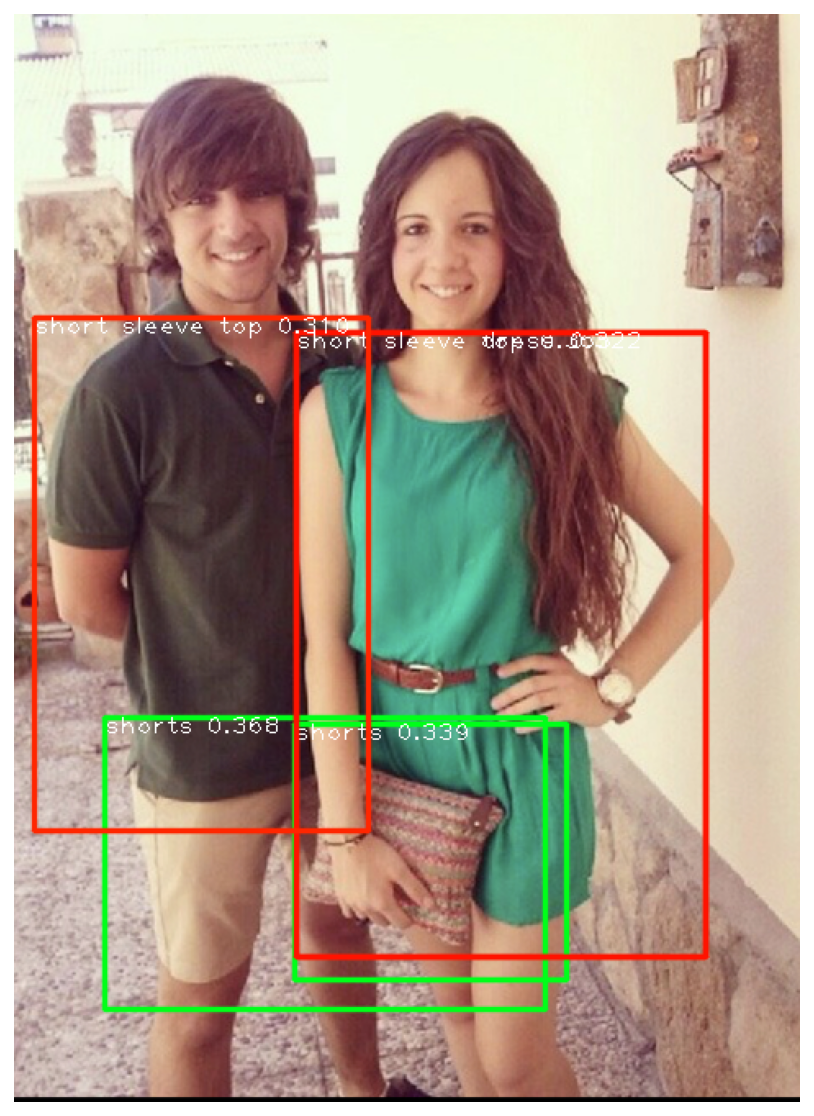

In [0]:
predecir('/content/IMG_DE690C7C4F0F-1.jpeg')

[177 242 318 556]
trousers 0.582
[160 150 329 502]
long sleeve outwear 0.437
[363 171 422 293]
short sleeve dress 0.415
[212 377 308 564]
trousers 0.411
[363 171 422 293]
vest dress 0.400
[362 171 422 293]
long sleeve outwear 0.334
[159 168 331 510]
short sleeve dress 0.318


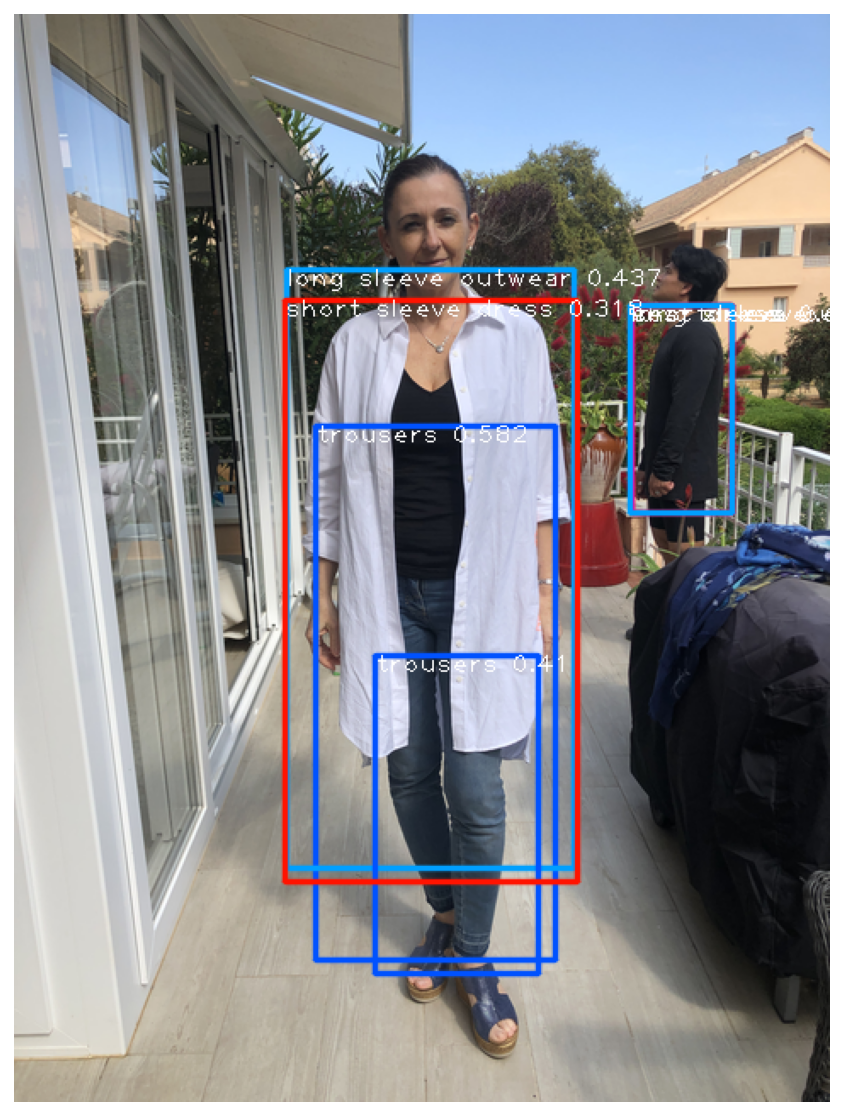

In [0]:
predecir('/content/IMG_5102.JPG')

Traceback (most recent call last):
  File "<ipython-input-16-b9236ac49f52>", line 8, in predecir
    exif=dict(image._getexif().items())
AttributeError: 'NoneType' object has no attribute 'items'


[145 134 326 429]
short sleeve dress 0.396
[146 136 326 431]
vest dress 0.351
[166 319 346 606]
trousers 0.330


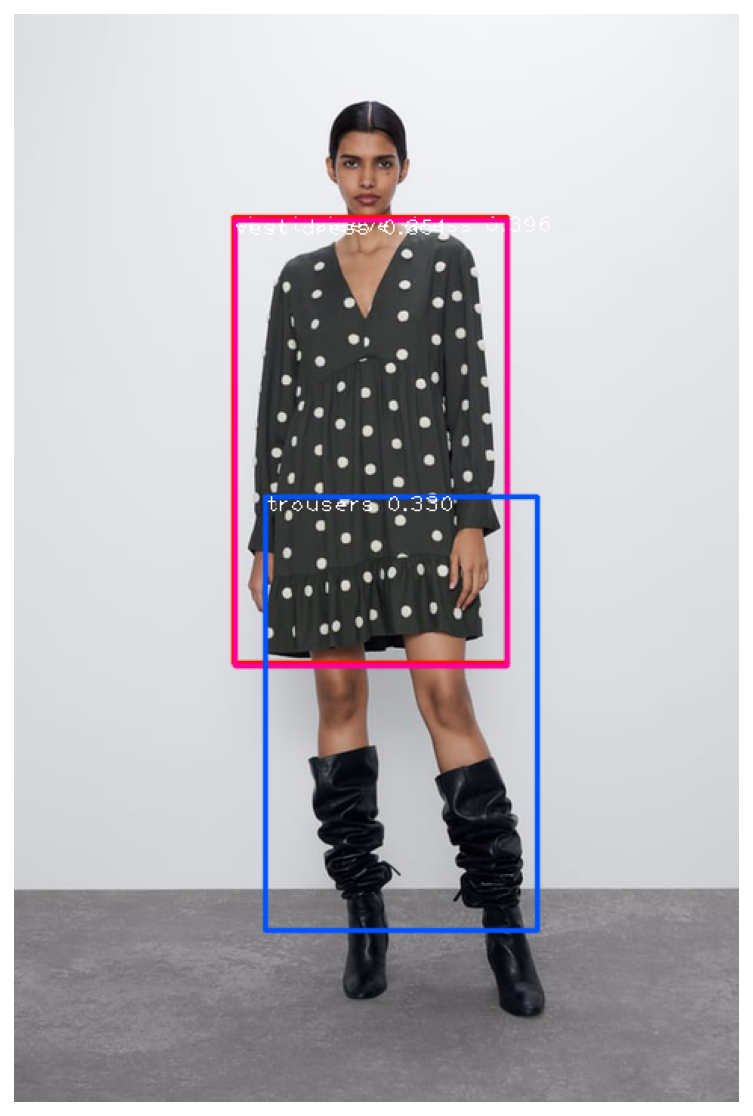

In [0]:
predecir('/content/vestido4.jpg')

Traceback (most recent call last):
  File "<ipython-input-16-b9236ac49f52>", line 8, in predecir
    exif=dict(image._getexif().items())
AttributeError: 'NoneType' object has no attribute 'items'


[  0   0 479 639]
short sleeve top 0.376


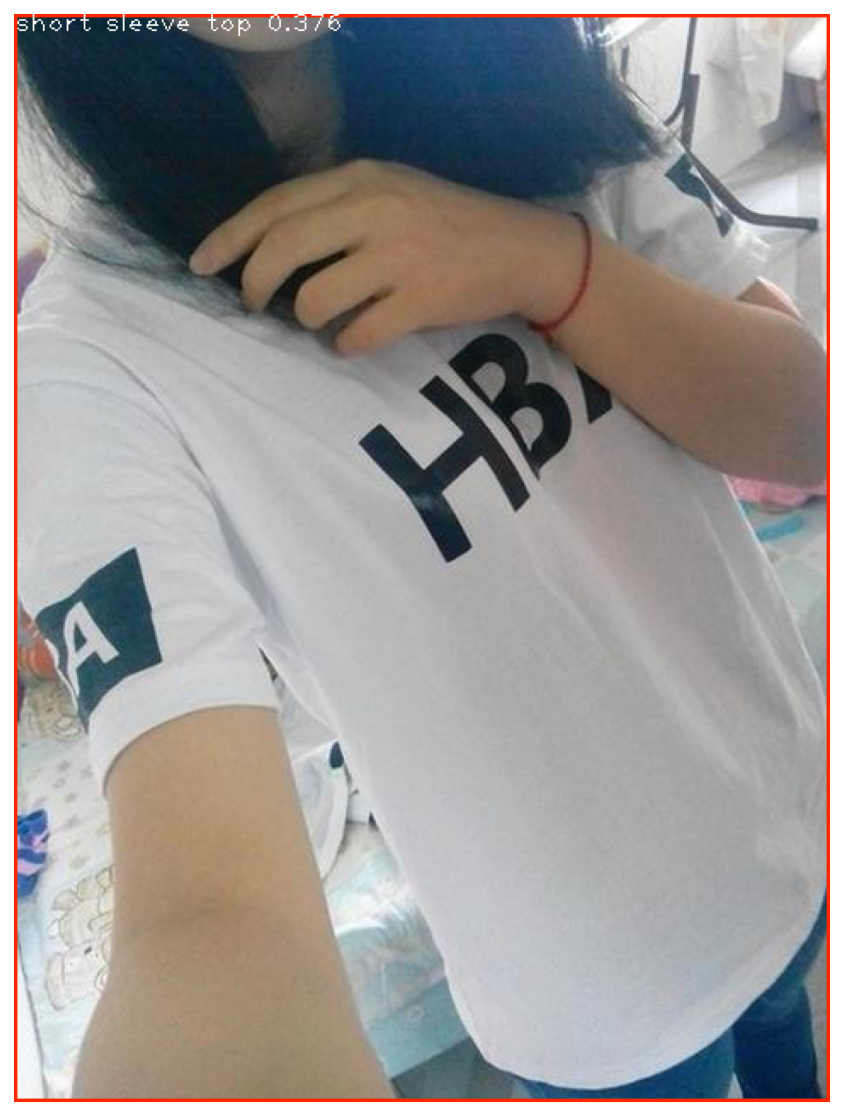

In [0]:
predecir('/content/000001.jpg')

[145 383 326 639]
trousers 0.699
[151 169 411 462]
short sleeve top 0.395
[169 170 395 458]
vest 0.316


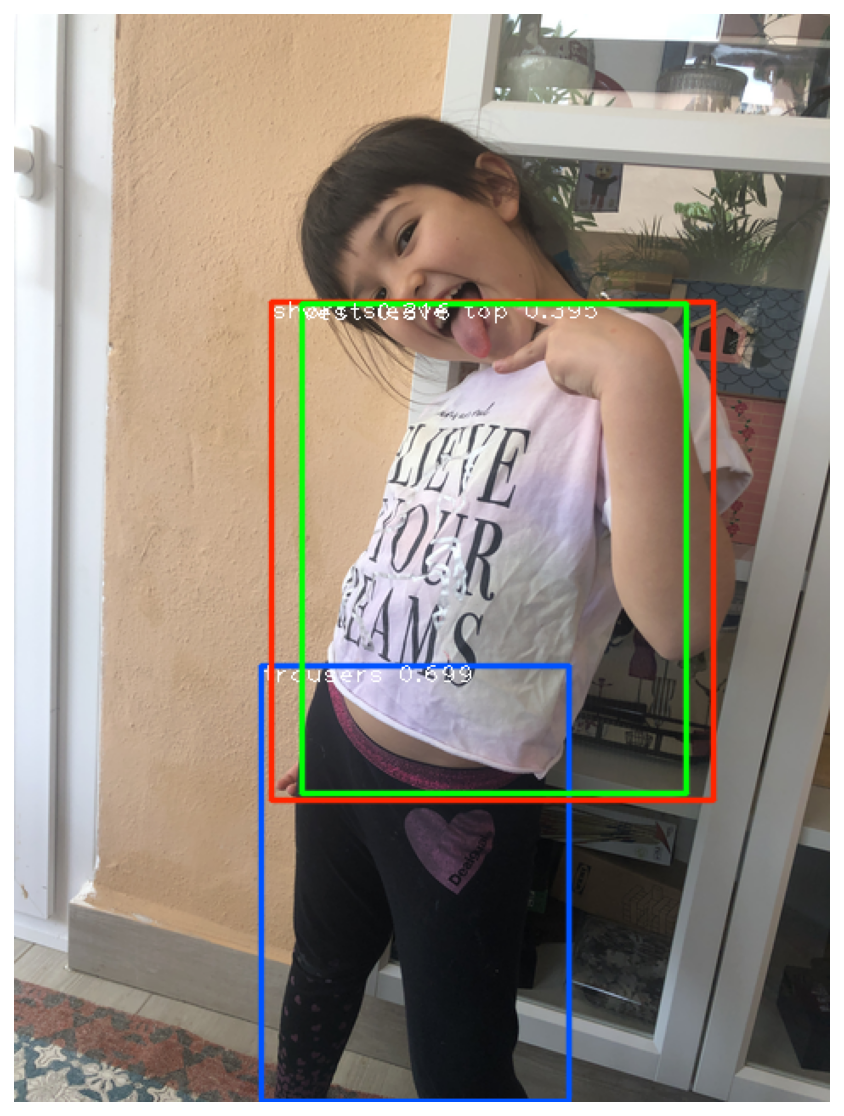

In [0]:
predecir('/content/IMG_1282.JPG')